In [0]:
import numpy as np
import pandas as pd
from glob import glob

Dataset : 
https://drive.google.com/open?id=1xROE0slMNbOXYTQGbDSSdhtiU1ugSWJ7

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
path_img = '/content/gdrive/My Drive/Tuto_seg/road_img/*'
path_mask = '/content/gdrive/My Drive/Tuto_seg/road_mask/*'

data_path = pd.DataFrame([], columns=('img', 'mask'))

for img in glob(path_img):
   new_path_mask = '/content/gdrive/My Drive/Tuto_seg/road_mask/'+img.split('/')[-1][:-3]+'png'
   data_path = data_path.append(pd.DataFrame([[img,
                                              new_path_mask]],
                                            columns=['img',
                                                    'mask']))

In [0]:
data_path.head()

,img,mask
0,/content/gdrive/My Drive/Tuto_seg/road_img/cen...,/content/gdrive/My Drive/Tuto_seg/road_mask/ce...
0,/content/gdrive/My Drive/Tuto_seg/road_img/cen...,/content/gdrive/My Drive/Tuto_seg/road_mask/ce...
0,/content/gdrive/My Drive/Tuto_seg/road_img/cen...,/content/gdrive/My Drive/Tuto_seg/road_mask/ce...
0,/content/gdrive/My Drive/Tuto_seg/road_img/cen...,/content/gdrive/My Drive/Tuto_seg/road_mask/ce...
0,/content/gdrive/My Drive/Tuto_seg/road_img/cen...,/content/gdrive/My Drive/Tuto_seg/road_mask/ce...


In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
test_x = cv2.imread(data_path.iloc[0, 0])
test_y = cv2.imread(data_path.iloc[0, 1])

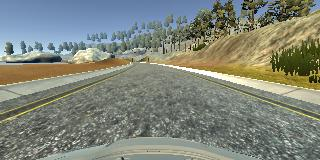

In [0]:
cv2_imshow(test_x)

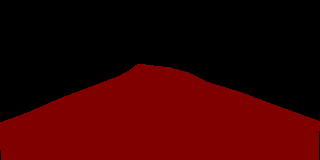

In [0]:
cv2_imshow(test_y)

In [0]:
X = np.array([cv2.imread(x[1][0]) for x in data_path.iterrows()])
Y = np.array([cv2.imread(x[1][1]) for x in data_path.iterrows()])

In [0]:
np.unique(Y)

array([  0, 128], dtype=uint8)

In [0]:
Y_1 = np.expand_dims(np.apply_along_axis(lambda x: np.any(x), 3, Y),axis=3)

In [0]:
np.unique(Y_1)

array([False,  True])

In [0]:
Y.shape

(202, 160, 320, 3)

In [0]:
Y_1.shape

(202, 160, 320, 1)

In [0]:
X.shape

(202, 160, 320, 3)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ELU, Conv2DTranspose, Conv2D

In [0]:
def base_model(image_size):

    model = Sequential()
    model.add(Conv2D(filters=32,
                kernel_size=(9, 9),
                name="conv1",
                activation=None,    
                padding="valid",
                input_shape=image_size))
    model.add(ELU(alpha=1.0))
    model.add(Conv2DTranspose(filters=1,
                kernel_size=(9, 9),
                name="Tconv2",
                activation="sigmoid"))
    model.summary()
    return model

In [0]:
model = base_model((160,320,3))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 152, 312, 32)      7808      
_________________________________________________________________
elu_1 (ELU)                  (None, 152, 312, 32)      0         
_________________________________________________________________
Tconv2 (Conv2DTranspose)     (None, 160, 320, 1)       2593      
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model.fit(x=X, 
          y=Y_1, 
          batch_size=32, 
          epochs=200, 
          verbose=1, 
          shuffle=True)

Epoch 1/200
7/7 [==============================] - 0s 33ms/step - loss: 4.4058 - accuracy: 0.5192
Epoch 2/200
7/7 [==============================] - 0s 21ms/step - loss: 2.7692 - accuracy: 0.5630
Epoch 3/200
7/7 [==============================] - 0s 22ms/step - loss: 2.1359 - accuracy: 0.5899
Epoch 4/200
7/7 [==============================] - 0s 22ms/step - loss: 1.7978 - accuracy: 0.6098
Epoch 5/200
7/7 [==============================] - 0s 22ms/step - loss: 1.5425 - accuracy: 0.6441
Epoch 6/200
7/7 [==============================] - 0s 22ms/step - loss: 1.3460 - accuracy: 0.6721
Epoch 7/200
7/7 [==============================] - 0s 22ms/step - loss: 1.1854 - accuracy: 0.7025
Epoch 8/200
7/7 [==============================] - 0s 22ms/step - loss: 1.0507 - accuracy: 0.7350
Epoch 9/200
7/7 [==============================] - 0s 22ms/step - loss: 0.9396 - accuracy: 0.7608
Epoch 10/200
7/7 [==============================] - 0s 22ms/step - loss: 0.8474 - accuracy: 0.7847
Epoch 11/200
7/7 [=

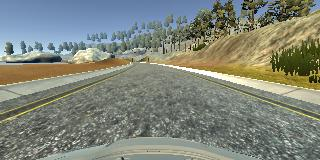

In [0]:
cv2_imshow(X[0])

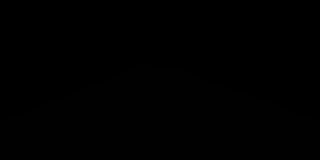

In [0]:
cv2_imshow(Y_1[0])

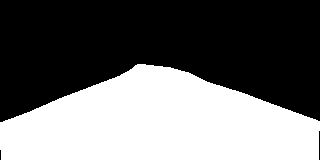

In [0]:
test_y = np.where(Y_1[0] > 0, 255, 0)
cv2_imshow(test_y)

In [0]:
test_pred = np.squeeze(model.predict(np.expand_dims(X[0], axis=0)))
test_pred.shape

(160, 320)

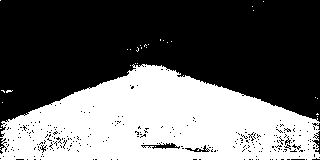

In [0]:
test_pred = np.where(test_pred > 0.8, 255, 0)
cv2_imshow(test_pred)